#  Task 3: Exploratory Data Analysis-Retail
## - By Mayank Sharma

#### Objective: To analyse the SampleSuperstore dataset which contains data about a superstore and the sales done along with some of the factors and their corresponding profits.

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Exploring the dataset

In [4]:
data=pd.read_csv(r'C:\Users\Mayank Sharma\Desktop\SampleSuperstore.csv',encoding='latin',low_memory='False')

In [5]:
data.head() #looking through the table

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.shape #checking the shape of table

(9994, 13)

In [7]:
data.columns #list of columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
data.describe() #a brief summary of numerical variables

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.info() #check the datatype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Preprocessing

In [11]:
data.isnull().sum() #looking for null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [24]:
data.nunique() #looking for unique values in each columns

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [14]:
data.duplicated().sum() #looking for duplicate items in table

17

In [15]:
data.loc[data.duplicated(),:] #displaying duplicate items in table


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [16]:
data.drop_duplicates(inplace=True) #removing duplicate items


In [17]:
data.shape #we see that numbers of row are reduced now

(9977, 13)

### Splitting the table on the basis of Profit and Loss

In [18]:
data_profit=data.loc[data.Profit>=0,:] #profit table
data_loss=data.loc[data.Profit<0,:] #loss table

In [19]:
data_profit.shape 

(8108, 13)

In [20]:
data_loss.shape

(1869, 13)

In [21]:
data_loss['Profit']=data_loss['Profit'].abs() #changing negative sign to positive loss value

In [22]:
data_loss.head()
data_loss.rename(columns={'Profit':'Loss'},inplace=True) #renaming profit to loss in loss table

## Data Visualization and EDA

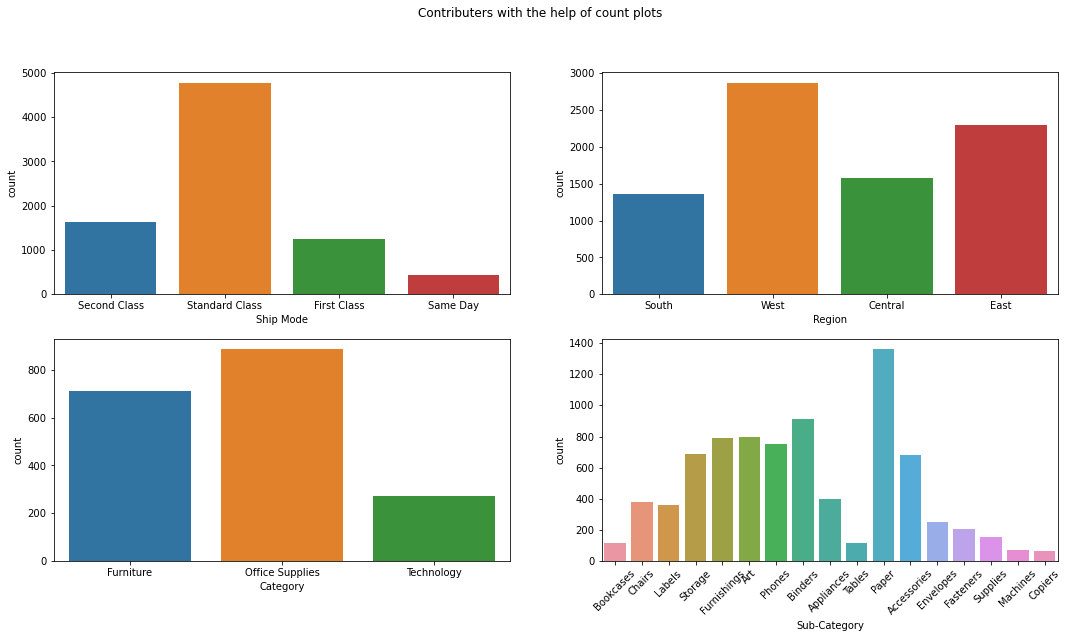

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(18, 9)) #plotting the count plots 
fig.suptitle('Contributers with the help of count plots')
sns.countplot(ax=axes[0][0], data=data_profit, x='Ship Mode')
sns.countplot(ax=axes[0][1], data=data_profit, x='Region')
sns.countplot(ax=axes[1][0], data=data_loss,x='Category')
sns.countplot(ax=axes[1][1], data=data_profit, x='Sub-Category')
plt.xticks(rotation=45) #to rotate the x labels by 45 degree
plt.show()


The above subplots show the count of different categorical variables which we will furthur use for EDA.

In [278]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


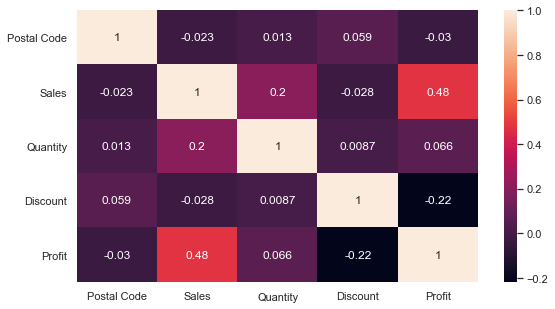

In [357]:
plt.figure(figsize=(9,5)) 
sns.heatmap(data.corr(),annot=True) #heatmap
plt.show()

We see that sales and profit are postively correlated but the relationship is not that strong. Also discount and profit have week negative correlation.

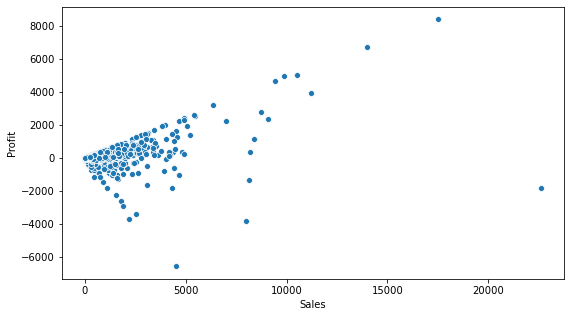

In [27]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='Sales',y='Profit',data=data) #scatterplot
plt.show()

It is observed from the plot that the profit increases with sales after a certain range. At very higher sales the profit is more but we usually consider them as outliers in the above graph.

In [28]:
sns.set_style('darkgrid')
sns.set(context='notebook',
    style='darkgrid',
    palette='gnuplot',
    font='sans-serif',
    font_scale=1,
    rc=None) #plot settings

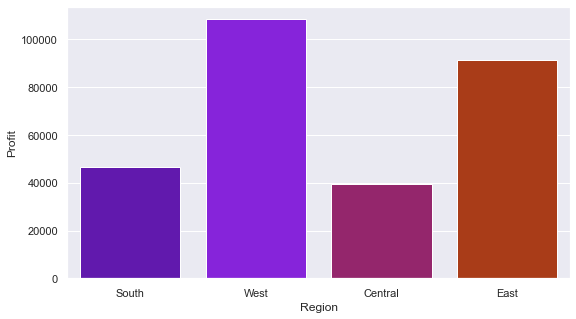

In [32]:
plt.figure(figsize=(9,5))
sns.barplot(x='Region',y='Profit',data=data,estimator=sum,ci=None)
plt.show()

The western and eastern are the most profitable regions.

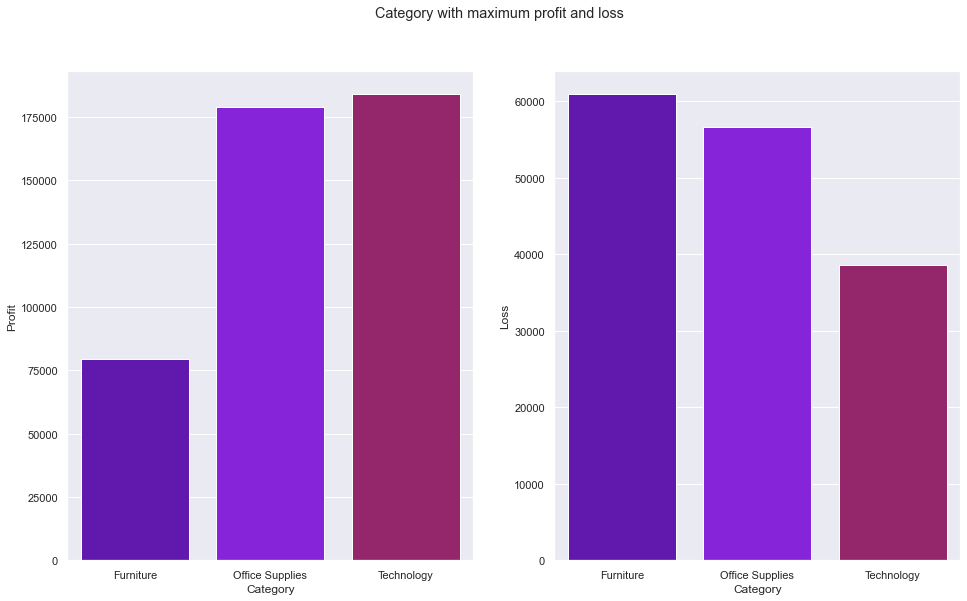

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle('Category with maximum profit and loss')
sns.barplot(ax=axes[0], data=data_profit, x='Category', y='Profit',estimator=sum,ci=None)
sns.barplot(ax=axes[1], data=data_loss,x='Category', y='Loss',estimator=sum,ci=None)
plt.show()

We observe that technology category accounts for more profit and furniture for the losses.

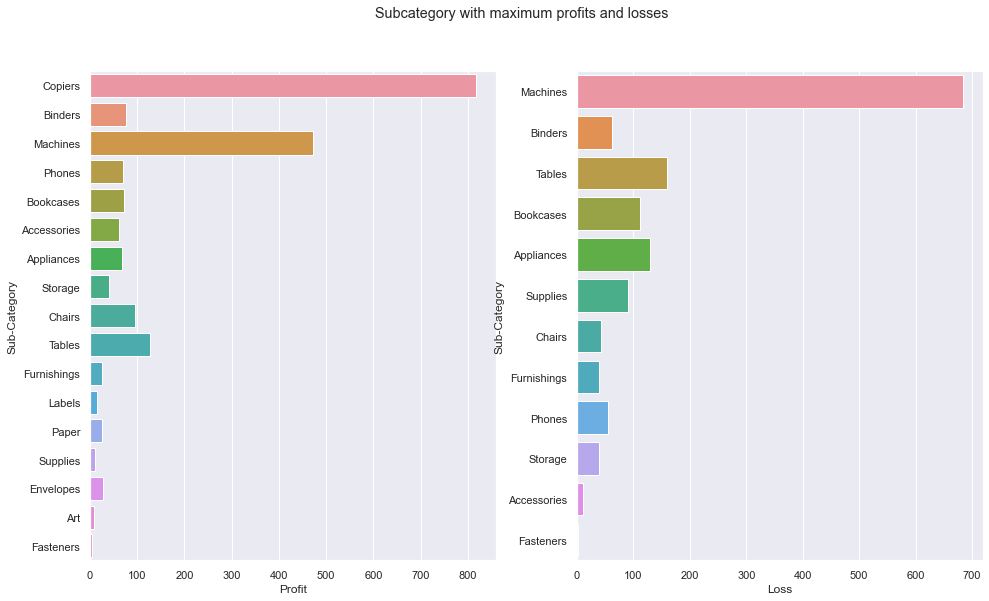

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle('Subcategory with maximum profits and losses')
sns.barplot(ax=axes[0], data=data_profit.sort_values('Profit',ascending=False), x='Profit', y='Sub-Category',ci=None)
sns.barplot(ax=axes[1], data=data_loss.sort_values('Loss',ascending=False), x='Loss', y='Sub-Category',ci=None)
plt.show()


The mean profit for copiers is maximum and is minumum for machines.

In [62]:
samp1 = data.groupby("Segment")["Profit"].sum() #preparing data for pie chart
samp2 = data.groupby("Ship Mode")["Profit"].sum() #preparing data for pie chart

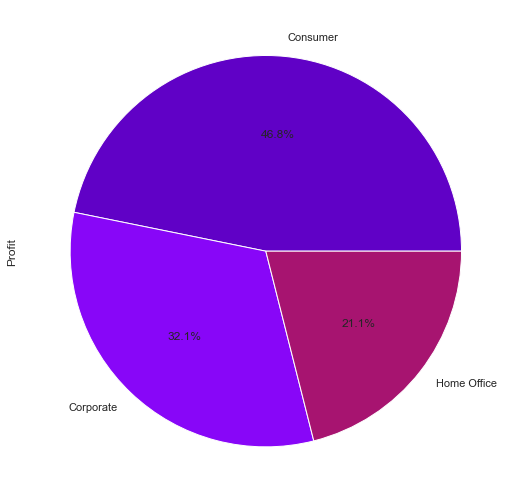

In [56]:
plt.figure(figsize=(16,9))
samp1.plot.pie(autopct="%.1f%%")
plt.show()

The consumer segment provides the maximum part of the profit

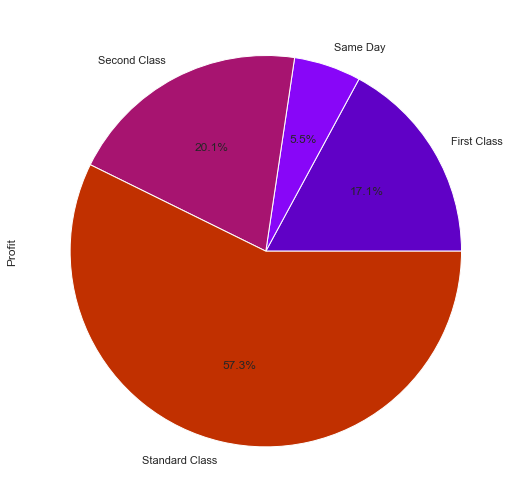

In [64]:
plt.figure(figsize=(16,9))
samp2.plot.pie(autopct="%.1f%%")
plt.show()

As we have seen earlier that Standard Class is most active in previous count plots, here it becomes clear that it also accounts for most of the profits too.

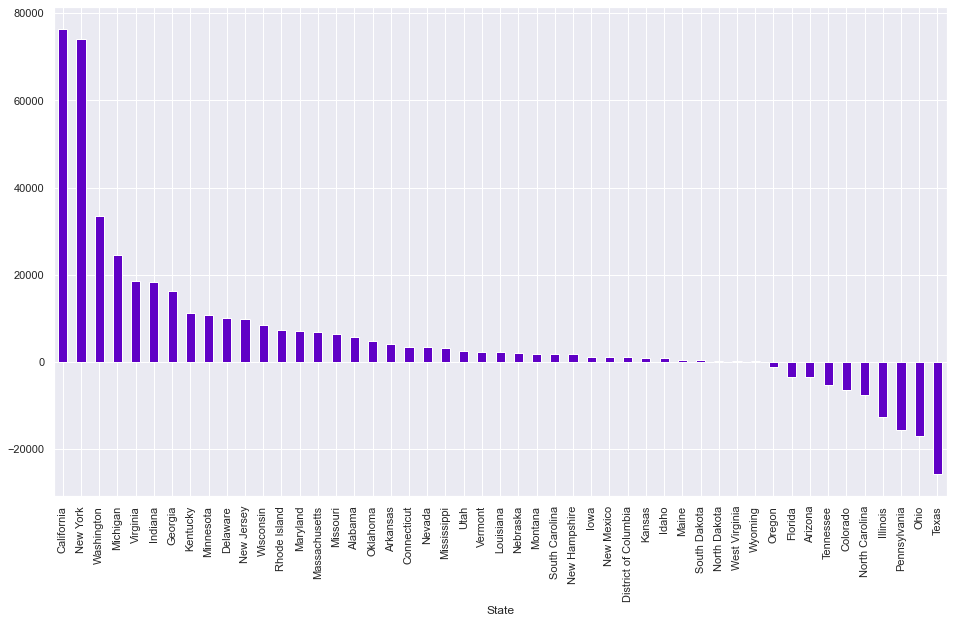

In [65]:
plt.figure(figsize=(16,9))
samp_data=data.groupby(["State"])["Profit"].sum()
samp_data.sort_values(ascending=False,inplace=True)
samp_data.plot.bar()
plt.show()

The states like California,New York show a good amount of profit while states like Texas and Ohio show some poor results of the same.

### We have performed the exploratory data analysis of the dataset. This can be used to for the feature engineering part to get new features if we want to train the model to predict the profits on an unknown test data.